In [1]:
#pip install tensorflow

In [2]:
#pip install tensorflow==2.12.0

## Los datos

Para aprender la sintaxis básica de Keras, usaremos un conjunto de datos falso muy simple, en las lecciones posteriores nos centraremos en conjuntos de datos reales, ¡junto con la ingeniería de funciones! Por ahora, centrémonos en la sintaxis de TensorFlow 2.0.

Supongamos que estos datos son medidas de algunas piedras preciosas raras, con 2 características de medida y un precio de venta. Nuestro objetivo final sería tratar de predecir el precio de venta de una nueva piedra preciosa que acabamos de extraer del suelo, para tratar de establecer un precio justo en el mercado.

### Cargar los datos

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('fake_reg.csv')

In [5]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Exploración de datos

Echemos un vistazo rápido, deberíamos ver una fuerte correlación entre las características y el "precio" de este producto inventado.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

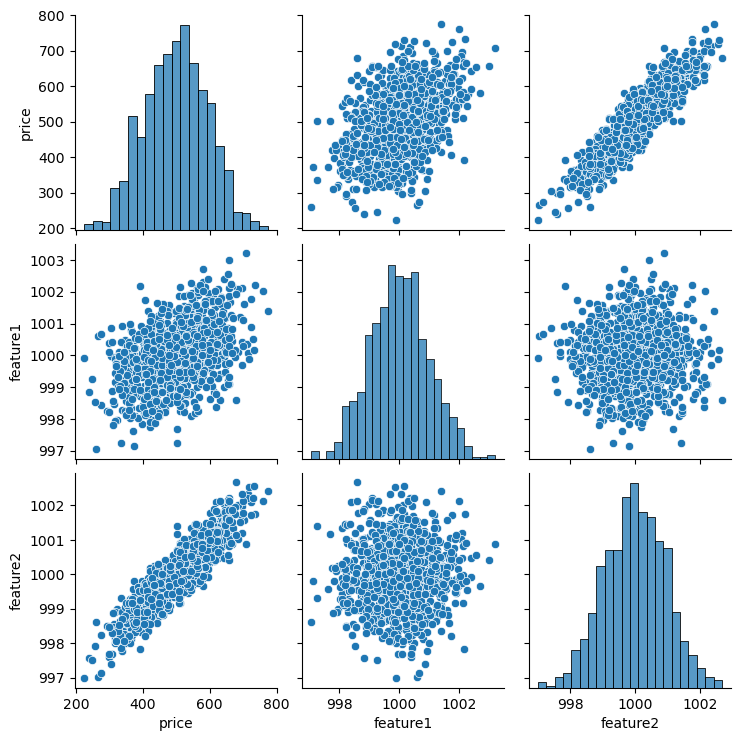

In [7]:
sns.pairplot(df)

Siéntase libre de visualizar más, pero estos datos son falsos, por lo que nos centraremos en la ingeniería de características y el análisis de datos exploratorios más adelante en el curso con mucho más detalle.

### División entrenamiento y prueba

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Convertir dataframe a arreglo de numpy

# predictores
X = df[['feature1','feature2']].values

# etiquetas
y = df['price'].values

# division
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
y_train.shape

(700,)

In [13]:
y_test.shape

(300,)

## Normalización/Escalado de los datos

Escalamos los datos de características.

[Por qué no necesitamos escalar la etiqueta](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [16]:
scaler = MinMaxScaler()

In [17]:
# aviso para evitar la fuga de datos del conjunto de prueba, solo ajustamos nuestro escalador al conjunto de entrenamiento

In [18]:
scaler.fit(X_train)

MinMaxScaler()

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Sintaxis


## Opciones de importación

Hay varias formas de importar Keras desde Tensorflow (esta es una elección de estilo muy personal, utilice cualquier método de importación que prefiera). Usaremos el método que se muestra en la **documentación oficial de TF**.

In [20]:
import tensorflow as tf

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

## Crear un modelo

Hay dos formas de crear modelos a través de la API de TF 2 Keras, pasar una lista de capas todas a la vez o agregarlas una por una.

Mostremos ambos métodos (depende de usted elegir qué método prefiere).

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Modelo como una lista de capas

In [24]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Modelo agregando capas

In [25]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Avancemos y construyamos un modelo simple y luego compilémoslo definiendo nuestro solucionador

In [26]:
#red 
model = Sequential()
#capa de entrada
model.add(Dense(4,activation='relu'))
#capas ocultas
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# capa de salida
model.add(Dense(1))

#compilacion del modelo
model.compile(optimizer='rmsprop',loss='mse')

### Elegir un optimizador y función de pérdida

Tenga en cuenta qué tipo de problema está tratando de resolver:

    # Para problema de clasificacion multiclase
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Para problema de clasificacion binario
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Para problema de regresion
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Entrenamiento

A continuación, se incluyen algunas definiciones comunes que es necesario conocer y comprender para utilizar correctamente Keras:

* **Sample:** un elemento de un conjunto de datos.
    
    * Ejemplo: una imagen es una muestra en una red convolucional
    
    * Ejemplo: un archivo de audio es una muestra para un modelo de reconocimiento de voz



* **Batch:** un conjunto de N muestras. Las muestras de un lote se procesan de forma independiente, en paralelo. Si se está entrenando, un lote da como resultado solo una actualización del modelo. Un lote generalmente se aproxima mejor a la distribución de los datos de entrada que una sola entrada. Cuanto mayor sea el lote, mejor será la aproximación; sin embargo, también es cierto que el lote tardará más en procesarse y dará como resultado una sola actualización. Para la inferencia (evaluar/predecir), se recomienda elegir un tamaño de lote que sea tan grande como pueda permitirse sin quedarse sin memoria (ya que los lotes más grandes generalmente darán como resultado una evaluación/predicción más rápida).


* **Epochs:** un corte arbitrario, generalmente definido como "una pasada sobre todo el conjunto de datos", que se usa para separar el entrenamiento en distintas fases, lo cual es útil para el registro y la evaluación periódica.



* Cuando se utiliza **validation_data** o **validation_split** con el método de ajuste de los modelos de Keras, la evaluación se ejecutará al final de cada epoch.



* Dentro de Keras, existe la posibilidad de agregar devoluciones de llamadas (**call_backs**) diseñadas específicamente para ejecutarse al final de una epoch. Ejemplos de estos son cambios en la tasa de aprendizaje y puntos de control del modelo (guardado).

In [27]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256610.5312
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256522.9219
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256432.0625
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 256324.2500
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256203.9062
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256070.9688
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255924.7969
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255762.2188
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255583.3125
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 255385.5781
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255167.0000
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 3ms/step - loss: 27999.3965
Epoch 97/250
22/22 [==============================] - 0s 4ms/step - loss: 24365.1250
Epoch 98/250
22/22 [==============================] - 0s 3ms/step - loss: 20897.5723
Epoch 99/250
22/22 [==============================] - 0s 3ms/step - loss: 17660.3848
Epoch 100/250
22/22 [==============================] - 0s 3ms/step - loss: 14662.0254
Epoch 101/250
22/22 [==============================] - 0s 3ms/step - loss: 11918.1875
Epoch 102/250
22/22 [==============================] - 0s 3ms/step - loss: 9483.8955
Epoch 103/250
22/22 [==============================] - 0s 3ms/step - loss: 7318.7964
Epoch 104/250
22/22 [==============================] - 0s 3ms/step - loss: 5486.9194
Epoch 105/250
22/22 [==============================] - 0s 3ms/step - loss: 4018.3457
Epoch 106/250
22/22 [==============================] - 0s 3ms/step - loss: 2891.0164
Epoch 107/250
22/22 [==============================] - 0s 3ms/step - loss: 2

22/22 [==============================] - 0s 2ms/step - loss: 177.1806
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 168.8279
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 161.2307
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 153.7028
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 145.0834
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 139.0874
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 132.4256
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 124.9098
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 118.6533
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 112.4029
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 106.6246
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 101.3100
Epoch 

## Evaluación

Evaluemos nuestro desempeño en nuestro conjunto de entrenamiento y nuestro conjunto de prueba. Podemos comparar estas dos actuaciones para verificar el sobreajuste.

In [28]:
model.history.history

{'loss': [256610.53125,
  256522.921875,
  256432.0625,
  256324.25,
  256203.90625,
  256070.96875,
  255924.796875,
  255762.21875,
  255583.3125,
  255385.578125,
  255167.0,
  254928.984375,
  254668.4375,
  254381.921875,
  254069.375,
  253728.9375,
  253359.015625,
  252959.6875,
  252527.71875,
  252057.234375,
  251553.546875,
  251009.578125,
  250427.890625,
  249805.734375,
  249139.21875,
  248426.625,
  247666.421875,
  246861.71875,
  246002.90625,
  245092.78125,
  244124.53125,
  243103.84375,
  242017.078125,
  240875.125,
  239665.71875,
  238401.03125,
  237062.3125,
  235657.46875,
  234183.5,
  232637.640625,
  231007.3125,
  229309.8125,
  227533.4375,
  225673.078125,
  223743.296875,
  221715.46875,
  219610.859375,
  217424.75,
  215138.78125,
  212763.265625,
  210309.765625,
  207775.078125,
  205145.390625,
  202419.453125,
  199583.6875,
  196667.640625,
  193648.640625,
  190535.0,
  187349.046875,
  184057.21875,
  180650.921875,
  177174.71875,
  173611

In [29]:
loss = model.history.history['loss']

In [30]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Perdidas de entrenamiento por epoca");

### Compare la evaluación final (MSE) en el conjunto de entrenamiento y el conjunto de prueba.

Con suerte, estos deberían estar bastante cerca uno del otro.

In [31]:
model.metrics_names

['loss']

In [32]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [33]:
training_score

24.294736862182617

In [34]:
test_score

26.196928024291992

### Evaluaciones adicionales

In [35]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [36]:
test_predictions

array([[406.48276],
       [624.1503 ],
       [592.7192 ],
       [573.2185 ],
       [368.3808 ],
       [579.9783 ],
       [516.40784],
       [459.9735 ],
       [550.2904 ],
       [448.37952],
       [612.41644],
       [549.29193],
       [420.29166],
       [410.16266],
       [651.2913 ],
       [438.2753 ],
       [508.9831 ],
       [660.8454 ],
       [663.2619 ],
       [566.1168 ],
       [335.85074],
       [445.95047],
       [383.95758],
       [379.99808],
       [567.39087],
       [611.4829 ],
       [533.31445],
       [428.9492 ],
       [656.2472 ],
       [415.068  ],
       [443.54962],
       [486.10654],
       [439.4843 ],
       [682.5163 ],
       [425.59384],
       [419.04428],
       [502.36307],
       [551.2429 ],
       [511.00888],
       [397.02142],
       [619.11273],
       [417.65497],
       [605.0259 ],
       [446.71356],
       [502.93335],
       [581.9295 ],
       [669.1152 ],
       [491.18698],
       [319.7914 ],
       [486.4516 ],


In [37]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [38]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [39]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [40]:
test_predictions

0      406.482758
1      624.150330
2      592.719177
3      573.218506
4      368.380798
          ...    
295    530.116638
296    516.939514
297    610.246399
298    417.896942
299    412.233154
Length: 300, dtype: float32

In [41]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [42]:
pred_df.columns = ['Y de Prueba','Predicciones del Modelo']

In [43]:
pred_df

,Y de Prueba,Predicciones del Modelo
0,402.296319,406.482758
1,624.156198,624.150330
2,582.455066,592.719177
3,578.588606,573.218506
4,371.224104,368.380798
...,...,...
295,525.704657,530.116638
296,502.909473,516.939514
297,612.727910,610.246399
298,417.569725,417.896942


Comparemos!

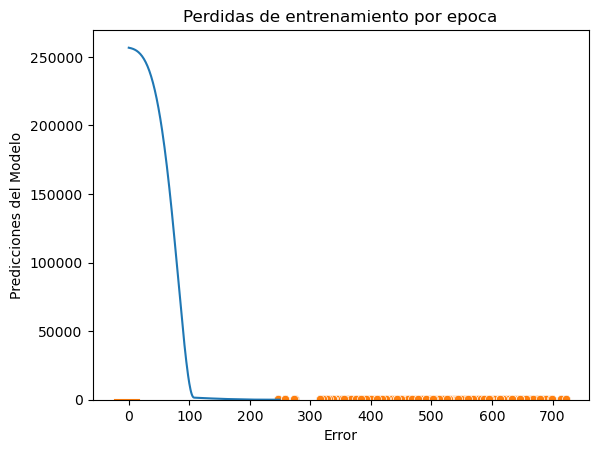

In [60]:
sns.scatterplot(x='Y de Prueba',y='Predicciones del Modelo',data=pred_df)
plt.show()

In [45]:
pred_df['Error'] = pred_df['Y de Prueba'] - pred_df['Predicciones del Modelo']

C:\Users\gilbe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


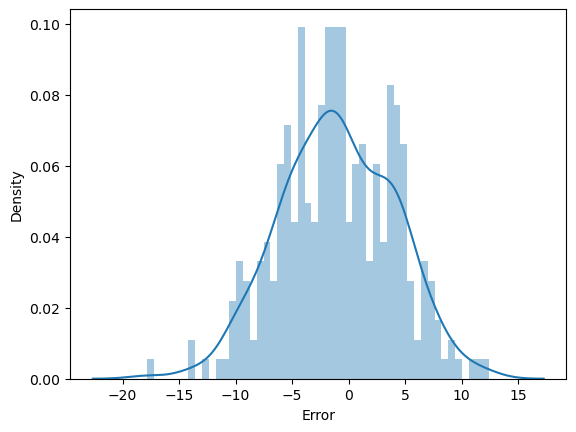

In [61]:
sns.distplot(pred_df['Error'],bins=50)
plt.show()

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [48]:
mean_absolute_error(pred_df['Y de Prueba'],pred_df['Predicciones del Modelo'])

4.1508471076466575

In [49]:
mean_squared_error(pred_df['Y de Prueba'],pred_df['Predicciones del Modelo'])

26.19693163423656

In [50]:
# Esencialmente lo mismo, la diferencia se debe solo a la precisión.
test_score

26.196928024291992

In [51]:
#RMSE
test_score**0.5

5.118293467972698

# Predecir con datos nuevos

¿Qué pasaría si acabáramos de ver una piedra preciosa nueva desde el suelo? ¿A qué precio deberíamos ponerlo? ¡Este es **exactamente** el mismo procedimiento que la predicción en una nueva prueba de datos!

In [52]:
# [[variable 1, variable 2]]
new_gem = [[998,1000]]

In [53]:
# No olvides escalar
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [54]:
new_gem = scaler.transform(new_gem)

In [55]:
model.predict(new_gem)

1/1 [==============================] - 0s 47ms/step


array([[421.27628]], dtype=float32)

## Salvando y cargando el modelo

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model.save('my_model.h5')  # crea un archivo HDF5 'my_model.h5'

In [58]:
#later_model = load_model('my_model.h5')

In [59]:
#later_model.predict(new_gem)